## Repaso:
Estabamos hablando de metodos de descenso.
La ecuacion clave es

$$\theta_{k+1} = \theta_k - \alpha \nabla J(\theta_k) .$$

# Steepest Descent

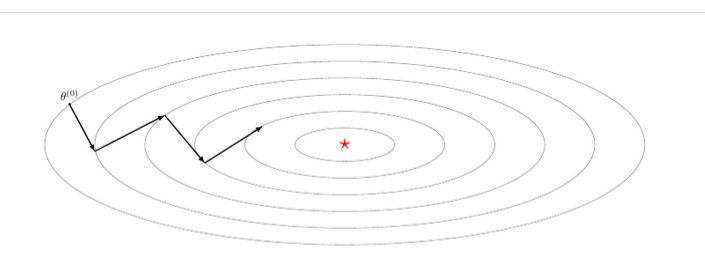

Vamos a ilustrar el metodo de steepest descent con un ejemplo **todavia** mas simmple. En $\mathbb{R}$.

En este caso el negativo gradiente apunta **siempre** al minimo.

Veamos un caso simple

$$ f(x) = x^4 .$$

El gradiente (derivada) es $f'(x)=4 x^3$.

Analicemos el algoritmo de **steepest descent**


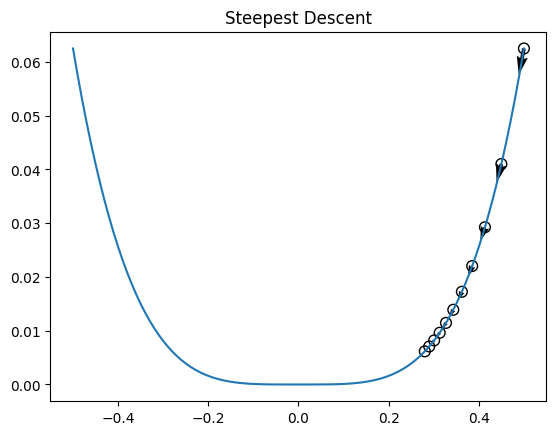

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# definamos la funcion objetivo
def f(x):
    return x**4


# definamos el gradiente
def gradf(x):
    return 4*x**3

eta = 0.1  # lo llamamos alpha en la case, el paso


# punto inicial
x=0.5

# lista de puntos
xlist = [x]
ylist = [f(x)]

M =10  # el numero de iteraciones
for i in range(M):
    x = x - eta*gradf(x)
    y = f(x)
    xlist.append(x)
    ylist.append(y)

# graficamos
xarr = np.array(xlist)
yarr = np.array(ylist)

xdomain = np.arange(-0.5, 0.51, 0.01)
plt.title("Steepest Descent")
plt.plot(xdomain, f(xdomain))

# grafica las flechas (vectores con arrow tips)
plt.quiver( xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:] - yarr[:-1],  angles='xy', scale=1)

plt.scatter( xlist, ylist, s=60, facecolors='none', edgecolors='k')


plt.show()




In [15]:
def sd(eta):

      # punto inicial
      x=0.5

      # lista de puntos
      xlist = [x]
      ylist = [f(x)]

      M =10  # el numero de iteraciones
      for i in range(M):
          x = x - eta*gradf(x)
          y = f(x)
          xlist.append(x)
          ylist.append(y)

      # graficamos
      xarr = np.array(xlist)
      yarr = np.array(ylist)

      xdomain = np.arange(-0.5, 0.51, 0.01)
      plt.title("Steepest Descent")
      plt.plot(xdomain, f(xdomain))

      # grafica las flechas (vectores con arrow tips)
      plt.quiver( xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:] - yarr[:-1],  angles='xy', scale=1)

      plt.scatter( xlist, ylist, s=60, facecolors='none', edgecolors='k')





      # punto inicial
      x=0.5

      # lista de puntos
      xlist = [x]
      ylist = [f(x)]

      M =10  # el numero de iteraciones
      for i in range(M):
          x = x - eta*gradf(x)
          y = f(x)
          xlist.append(x)
          ylist.append(y)

      # graficamos
      xarr = np.array(xlist)
      yarr = np.array(ylist)

      xdomain = np.arange(-0.5, 0.51, 0.01)
      plt.title("Steepest Descent")
      plt.plot(xdomain, f(xdomain))

      # grafica las flechas (vectores con arrow tips)
      plt.quiver( xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:] - yarr[:-1],  \
                 scale_units='xy', angles='xy', scale=1)

      plt.scatter( xlist, ylist, s=60, facecolors='none', edgecolors='k')


      plt.show()

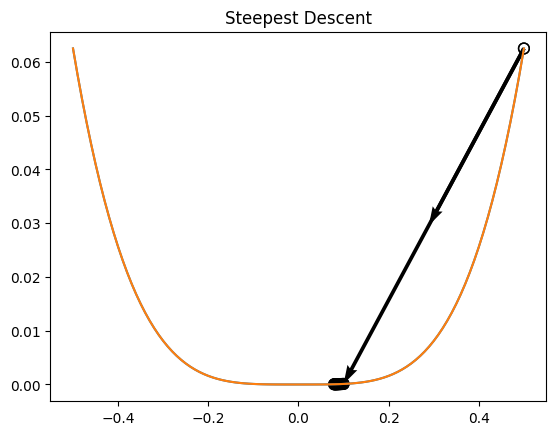

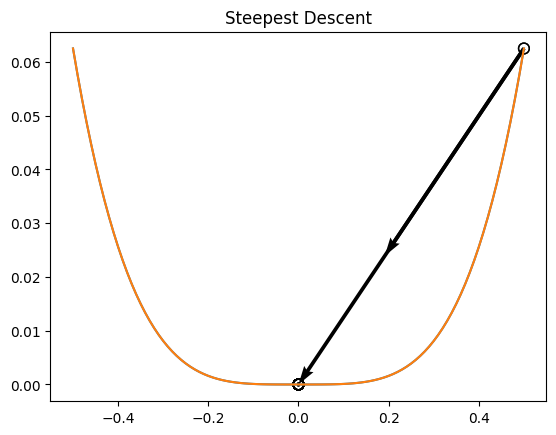

In [23]:
sd(0.8) # otros valores
sd(1)

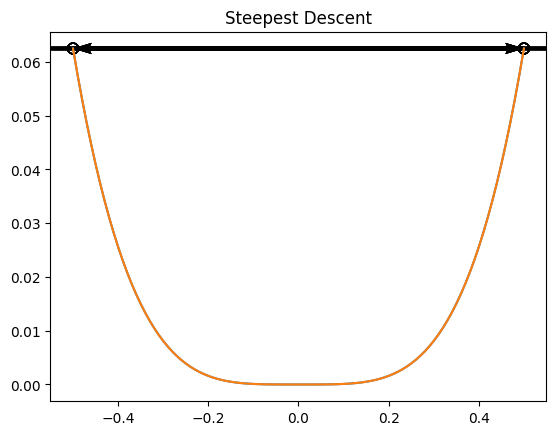

In [17]:
sd(2)

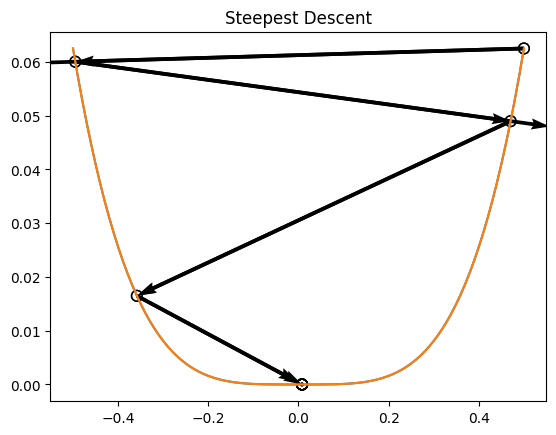

In [20]:
sd(1.99)

Es casualidad o $\eta=1$ es el parametro de **steepest descent**.

Explicacion de $\eta=1$ para SD.

Quermos hallar $\eta$ que acelere el proceso al maximo

\begin{eqnarray}
f(x) &=& x^4 \\
f'(x) &=& 4 x^3 \\
\varphi(\eta) &=& (x - \eta f'(x))^4   
\varphi'(\eta) &=& 4 ( x - \eta f'(x))^3 \\
\varphi'(\eta)&=&0 \implies x = \eta f'(x)
\end{eqnarray}
O  sea que



$$\eta = \frac{x}{4 x^3} = \frac{1}{4 x^2} .$$
pero $x=0.5=1/2$

$$\eta = \frac{1}{4 (1/2)^2} = 1 .$$

Los algoritmos que buscan el valor optimo de $\alpha$ ($\eta$ en el demo) se llaman

### Line search algoritmos (algoritmos de busqueda).

Si la funcion es cuadratica el metodo de Conjugate Gradient es el mejor (nada le gana)

En general la funcion no es cuadratica.

Recuerden la iteracion

$$\theta_k = \theta_{k-1} - \alpha \nabla J(\theta_{k-1}) .$$

Pensamos que podemos definir la funcion auxiliar, tal como lo hicimos en SD.


$$\varphi(\alpha) = J[ \theta_0 - \alpha \nabla J(\theta_0)]  . \tag{1} $$

El problema es que cuando $J$ sea una funcion muy complicada, esto no se puede hacer.

Que se hace en este caso? Hay tres posibilidades:


1. Resolver la ecuacion (1). Pero acabamos de decir que esto casi siempre es inutil.

2. Podemos calcular tres valores diferentes de $\alpha$, (en una curva)
 y ajustamos la curva a una parabola, y escojemos el $\alpha$ que me produzca el minimo.

3. Backtracking: Se escoge un $\alpha$ grande (que es grande? $\alpha=2$.
luego comienza a reducir el valor de $\alpha$. Hasta encontrar un $\alpha$ optimo. Este algoritmo se llama Armijo (matlab tiene la funcion so_step_armijo
basado en un articulo de Larray Armijo.


4. Prueba y error. Comienza con un $\alpha$ pequenho ($\alpha=0.01$) y lo comienza incrementar..

Existen muchas tecnicas para acelerar la convergencia basadas no solo en el paso $\alpha$ sino en las direcciones. Menciono unas pocas que ensenho en el curso de DL (deep learning)

* Momento (Poliak)
* Nesterov (Nesterov)
* AdaGrad
* AdaDelta
* RMSProp
* Adam
entre otras.

Que elementos necesitamos para resolver estos problemas de optimizacion usando el metodo del gradiente.

* La hipotesis del modelo $h(\theta)$.
* La funcion de costo $J$
* El gradiente de la funcion de costo $\nabla J$
* El maximo numero de iteraciones $M$.
* La tolerancia.




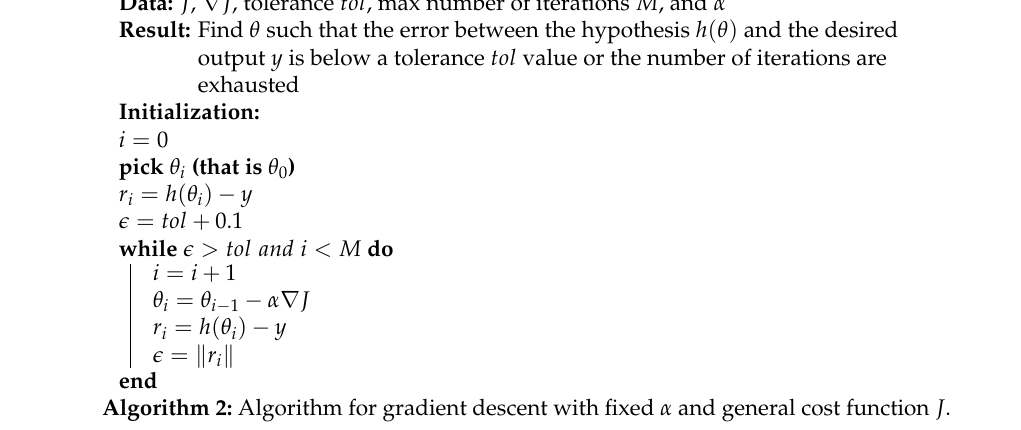

El siguiente algoritmo es una simplificacion de este algoritmo.

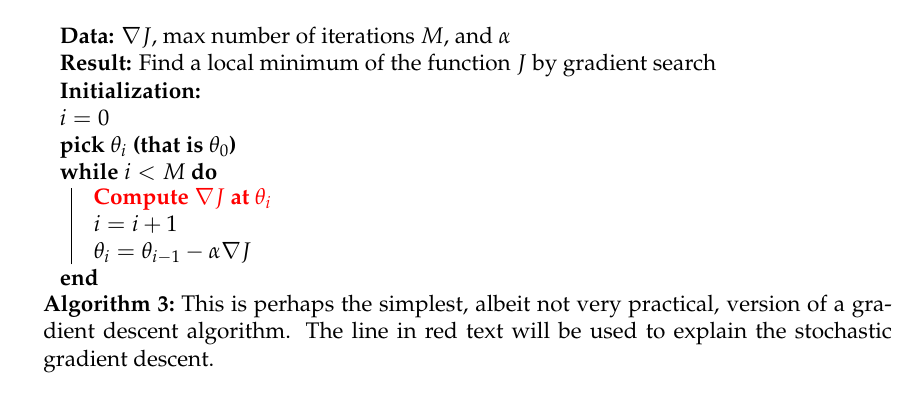


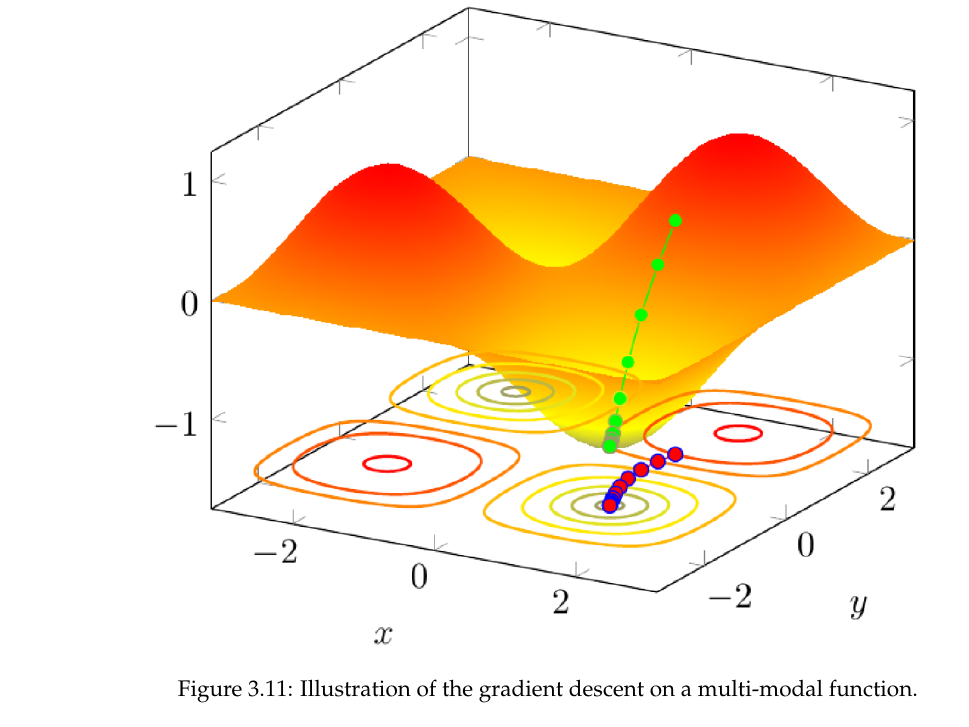

## Stochastic Gradient Descent (SGD). Descenso con gradiente estocastico

### Motivacion.
1. Asuma una red neuronal profunda con 10 capas entre ocultas, salida y entrada.
2. Asuma que los datos de tnrada con 10,000 imagenes de $100 \times 100$ pixeles. Los pixeles son grises (pero si es RGB tres canales).
3. Cada capa tiene 100 neuronas (nodos) incluyendo el "bias" (lo explico masa tarde)

Hagamos el calculo de los pesos de la red.
El item 2 , $10,000 \times 100 \times 100= 10^8$.

$$ wights = 10^8 \times (100)^{10} = 10^{28}.$$

$10^{28}$ es un numero **demasiado** grande.

Si los datos tiene $m \gg 1$ puntos, el SGD solo calcula $1$ y entonces
tenemos una ganacia de $m$ a $1$.

Voy a presentar tres situaciones, entre muchas otras, que ocurren muy a menudo.

1. El problema de minimos cuadrados (sin regularizacion)


$$J(x, A, y) = \frac12 \| A x - y \|^2 = \frac12 \sum_{i=1}^m \left ( \sum_{j=1}^n ( a_{ij} x_j - y_i) \right )^2 .$$

Re-escribamos esta funcion objetivo de una forma conveniente y esta es

$$J(x, A, y ) = \frac1m \sum_{i=1}^m C_i(x, A, y) .$$


$$C_i(x, A, y) = \frac{m}{2} \left ( \sum_{j=1}^n ( a_{ij} x_j - y_i \right )^2 .$$

2. Regresion logistica (clases proxima semana de esto)

$$J(\theta , x, y) = -\frac1m \sum_{i=1}^m y_i \log[ h(\theta, x^{(i)})] + (1 - y_i) \log[ 1 - h(\theta, x^{(i)}] .$$

Aca $x^{(i)}$ es una muestra (una fila de la matriz $A$, o un dato)
Tambien podemos como en le paso anterior escribir


$$J(\theta, x, y) = \frac1m \sum_{i=1}^m C_i(x, \theta,  y) .$$
donde
$$C_i (x, \theta, y) = - \left [ y_i \log[ h(\theta, x^{(i)})] + (1 - y_i) \log[ 1 - h(\theta, x^{(i)}]  \right ]  .$$

Podemos insertar el elemento de regularizacion sin problema. Por que?

Este termino es

$$ \frac{\lambda}{2m} \sum_{i=1}^n \theta_i^2 .$$
Este termino es facil de manejar por que su derivada es

$$\frac{\partial}{\partial \theta_k} \left(  \frac{\lambda}{2m} \sum_{i=1}^n \theta_i^2\right )  = \frac{\lambda}{2m} 2 \sum_{i=1}^m \theta_i \frac{\partial \theta_i}{\partial \theta_k} = \frac{\lambda}{2m} 2 \sum_{i=1}^m \theta_i  \delta_{ki} = \frac{\lambda}{m} \theta_k .$$


El gradiente es lineal, es decir el gradiente de la suma, es la suma de los gradientes. Entonces, en cualquier de los casos de arriba


$$ \nabla J(x, \theta, y) = \frac1m \sum_{i=1}^m \nabla C_i(x, \theta, y) .$$

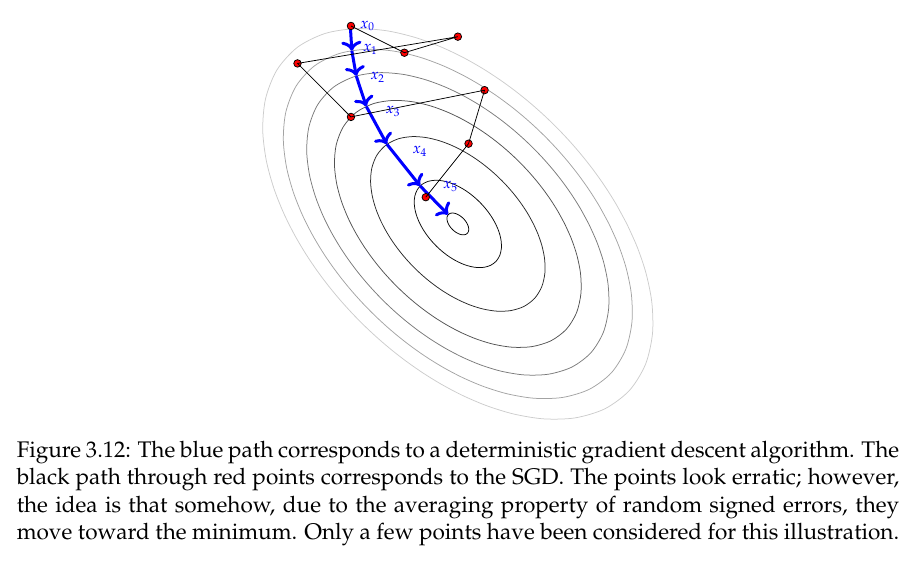

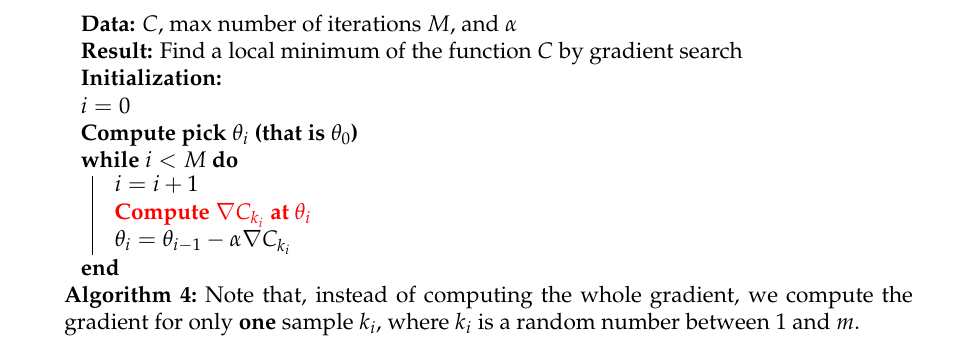

En la proxima clase explicamos por que el SGD tiene sentido como se plantea.